In [63]:
import numpy as np
import matplotlib.pyplot as plt

(256, 256, 4)


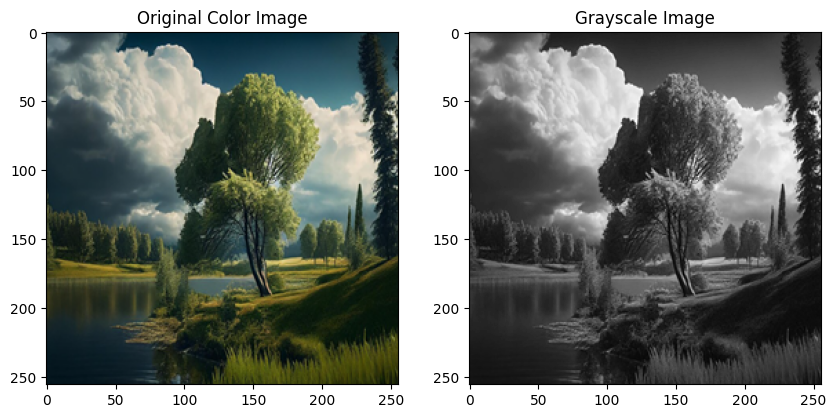

In [64]:
img = plt.imread('image/nature256.png')
print(img.shape)
# img = img[:,:,1]
gray_image = np.mean(img, axis=-1)
# plt.imshow(img)
# Display the original and grayscale images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Color Image')

plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')

plt.show()

In [65]:
nk = np.zeros(256)
height, width = gray_image.shape
# print(gray_image[1][4])
# print(gray_image.shape)
for i in range(height):
    for j in range(width):
        nk[int(gray_image[i][j]*255)] += 1
# print(histogram)

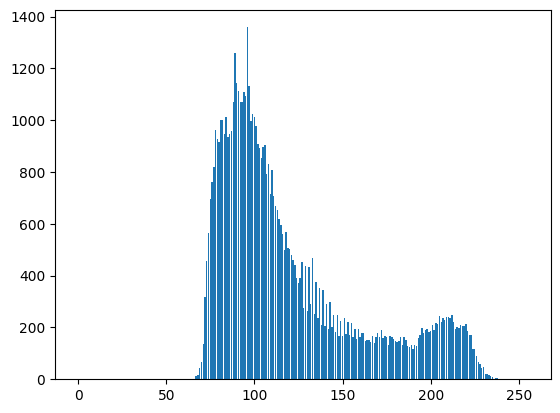

In [66]:
plt.bar(np.arange(256), nk)
plt.show()

In [67]:
pdf = np.zeros(256)
total_bits = height * width
for i in range(256):
    pdf[i] = nk[i]/total_bits

# print(np.sum(pdf))
print(pdf)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.52587891e-05
 1.52587891e-05 0.000000

In [68]:
cdf = np.zeros(256)
cdf[0] = pdf[0]
for i in range(1,256):
    cdf[i] = cdf[i-1] + pdf[i]

print(cdf[255])

1.0


In [69]:
histogram_equ = np.zeros(256)
for i in range(256):
    histogram_equ[i] = int(cdf[i]*255)
print(histogram_equ)

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   1.   2.   4.   6.   8.  11.  15.  18.  22.  26.  29.  33.  37.
  41.  45.  48.  52.  56.  61.  66.  70.  74.  78.  83.  87.  92.  96.
 100. 104. 108. 112. 116. 119. 122. 126. 129. 133. 136. 139. 142. 144.
 147. 150. 152. 154. 156. 158. 161. 163. 165. 166. 168. 170. 171. 173.
 174. 176. 177. 179. 180. 182. 183. 185. 186. 187. 188. 189. 190. 191.
 192. 193. 194. 195. 196. 197. 198. 199. 199. 200. 201. 202. 203. 203.
 204. 205. 206. 206. 207. 208. 208. 209. 210. 210. 211. 211. 212. 213.
 213. 214. 215. 215. 216. 217. 217. 218. 218. 219. 220. 220. 221. 221.
 222. 223. 223. 224. 224. 225. 225. 226. 226. 227. 227. 228. 229. 229.
 230. 

In [70]:
equlized_img = np.zeros((int(height), int(width)), dtype=np.uint8)
print(equlized_img.shape)
print(np.max(histogram_equ))
# print(np.max(gray_image))
for i in range(height):
    for j in range(width):
        equlized_img[i][j] = histogram_equ[int(gray_image[i][j]*255)]
        # histogram_equ[gray_image[i][j]]

print(equlized_img)

(256, 256)
255.0
[[179 183 182 ...  92 104  41]
 [182 185 182 ...  87  96  70]
 [185 185 182 ...  92  96 100]
 ...
 [ 18  18  18 ...  26   6  96]
 [ 15  15  15 ...  18  11  48]
 [ 15  15  11 ...  15  22  18]]


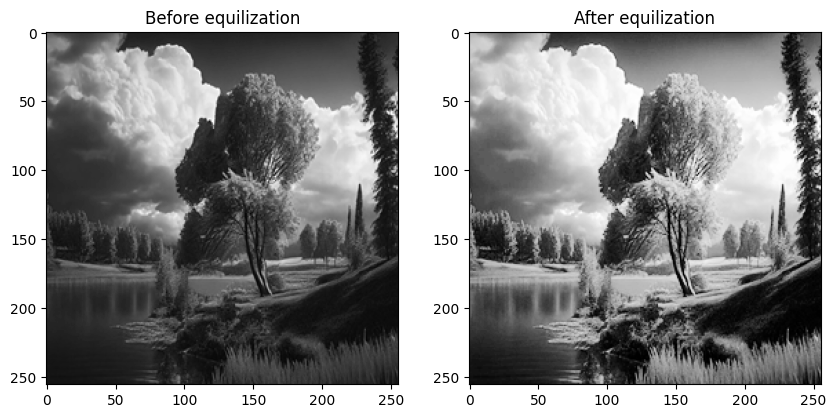

In [71]:
# Display the original and grayscale images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Before equilization')

plt.subplot(1, 2, 2)
plt.imshow(equlized_img, cmap='gray')
plt.title('After equilization')

plt.show()


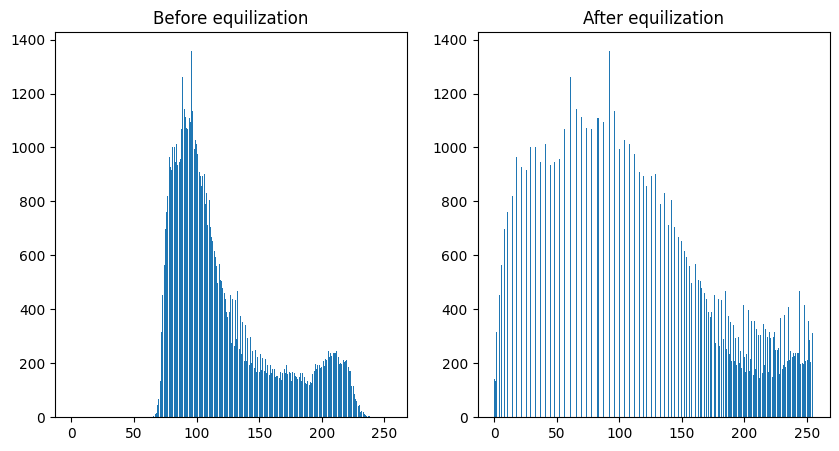

In [72]:
nk1 = np.zeros(256)
# print(gray_image[1][4])
# print(gray_image.shape)
for i in range(height):
    for j in range(width):
        nk1[int(equlized_img[i][j])] += 1

# Display the original and grayscale images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(np.arange(256), nk)
plt.title('Before equilization')

plt.subplot(1, 2, 2)
plt.bar(np.arange(256), nk1)
plt.title('After equilization')

plt.show()
